In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from sklearn.preprocessing import OneHotEncoder

In [16]:
iris_data=pd.read_csv(r'C:\Users\keerthi\OneDrive - HEALTH CAREERS INTERNATIONAL PTY LTD\Keerthi\iris.csv')

In [17]:
iris_data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


###  Data pre-processing

In [18]:
iris_data.info()    #Dataset Description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
iris_data['Classification'].value_counts() #Data Encoding

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [20]:
one_hot = OneHotEncoder()
transformed_data = one_hot.fit_transform(iris_data['Classification'].values.reshape(-1,1)).toarray() 
one_hot.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

In [21]:
transformed_data = pd.DataFrame (transformed_data, columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
transformed_data.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [22]:
warnings.filterwarnings('ignore') #Normalization-MinMaxScaler
normalizer = MinMaxScaler()
transformed_data.dropna(axis = 1, inplace=True)
normalized_data = normalizer.fit_transform(transformed_data)
pd.DataFrame(normalized_data, columns = transformed_data.columns)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [23]:
standard_scaler = StandardScaler() #standardization
standardized_data = standard_scaler.fit_transform(transformed_data)
pd.DataFrame(standardized_data, columns = transformed_data.columns)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.414214,-0.707107,-0.707107
1,1.414214,-0.707107,-0.707107
2,1.414214,-0.707107,-0.707107
3,1.414214,-0.707107,-0.707107
4,1.414214,-0.707107,-0.707107
...,...,...,...
145,-0.707107,-0.707107,1.414214
146,-0.707107,-0.707107,1.414214
147,-0.707107,-0.707107,1.414214
148,-0.707107,-0.707107,1.414214


In [24]:
from sklearn.impute import SimpleImputer  #Imputation of missing values
imputer = SimpleImputer (missing_values=np.nan, strategy='mean') 
agent_col = imputer.fit_transform(standardized_data)
pd.DataFrame(agent_col).isnull().sum()

0    0
1    0
2    0
dtype: int64

In [25]:
from sklearn.preprocessing import KBinsDiscretizer  #KMeans Discretization Transform
trans = KBinsDiscretizer(n_bins =10, encode = 'ordinal', strategy='kmeans') 
new_data = trans.fit_transform(transformed_data)
pd.DataFrame(new_data, columns = transformed_data.columns)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


###  classification models

In [26]:
iris=pd.read_csv(r'C:\Users\keerthi\OneDrive - HEALTH CAREERS INTERNATIONAL PTY LTD\Keerthi\iris.csv')

In [27]:
iris.fillna(iris.mean(numeric_only=True).round(1), inplace=True)

In [28]:
iris.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [29]:
x = iris.drop(['Classification'], axis=1)
y = iris['Classification']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)

In [31]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

In [32]:
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9333333333333333


##### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [35]:
from sklearn.metrics import classification_report # Classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        24
Iris-versicolor       0.91      0.91      0.91        23
 Iris-virginica       0.93      0.93      0.93        28

       accuracy                           0.95        75
      macro avg       0.95      0.95      0.95        75
   weighted avg       0.95      0.95      0.95        75



In [36]:
from sklearn.linear_model import Perceptron
pn = Perceptron(tol=1e-3, random_state=0)
pn.fit(x_train, y_train)

Perceptron()

In [37]:
pn.score(x_train,y_train) #Training Accuracy

0.8

In [38]:
pn.score(x_test,y_test) #Testing Accuracy

0.68

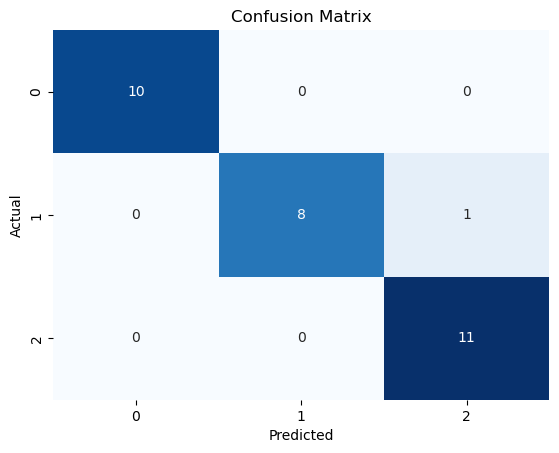

In [39]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### SVM Classification

In [40]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



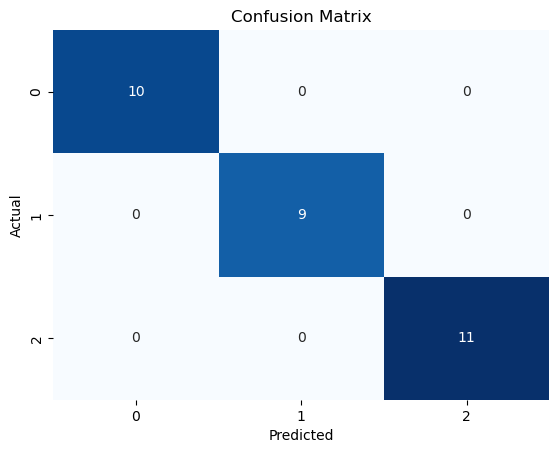

In [41]:
# load the dataset
iris1=pd.read_csv(r'C:\Users\keerthi\OneDrive - HEALTH CAREERS INTERNATIONAL PTY LTD\Keerthi\iris.csv')

iris1.fillna(iris1.mean(numeric_only=True).round(1), inplace=True)

X = iris1.drop(['Classification'], axis=1)
y = iris1['Classification']
# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.svm import SVC
# create SVM classifier with a radial basis function (RBF) kernel
svm_classifier = SVC(kernel='rbf', gamma='scale')
# train the model using the training sets
svm_classifier.fit(X_train, y_train)
# make predictions on the testing set
y_pred = svm_classifier.predict(X_test)


# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### KNN Classification

In [42]:
irisdata=pd.read_csv(r'C:\Users\keerthi\OneDrive - HEALTH CAREERS INTERNATIONAL PTY LTD\Keerthi\iris.csv')

irisdata.fillna(irisdata.mean(numeric_only=True).round(1), inplace=True)

X = irisdata.drop(['Classification'], axis=1)
y = irisdata['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_Train = {X_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

X_Train = (120, 4)
X_test = (30, 4)
y_train = (120,)
y_test = (30,)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

# create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# train the model using the training sets
knn.fit(X_train, y_train)

# make predictions on the testing set
y_pred = knn.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [44]:
y_test 

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Classification, dtype: object

In [45]:
#accuracy
from sklearn.metrics import accuracy_score
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [46]:
from sklearn.metrics import confusion_matrix, classification_report
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


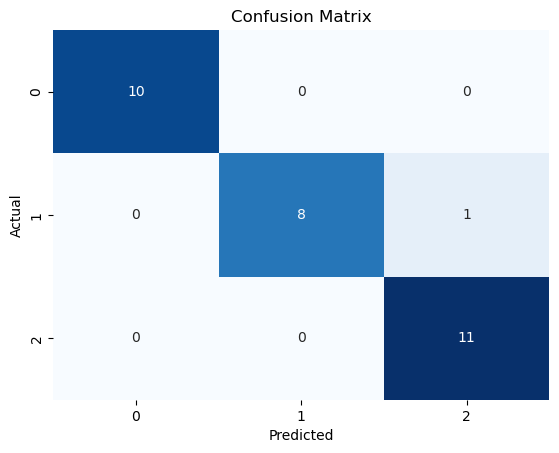

In [47]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



#### Logestic regression gives the best result 